# create group of mall customers based on their annual income and spending score

In [66]:

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import *
from sklearn.metrics import *
sns.set()

In [67]:
dataframe = pd.read_csv('Data/Mall_Customers.csv')

In [68]:
dataframe.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


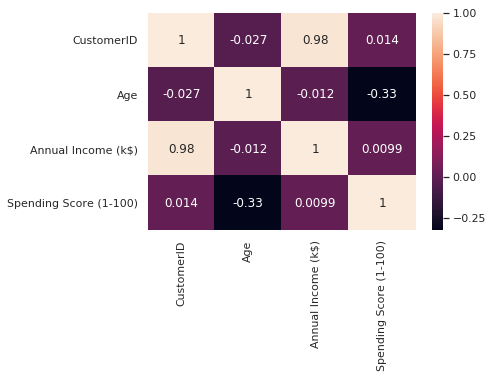

In [69]:
sns.heatmap(dataframe.corr(),annot=True)

In [70]:
# as question states group by Anunual income and Spending salary hence we'll select the same 2 columns here

In [71]:
X = dataframe.iloc[:,[3,4]]

In [72]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [73]:
wcss=[]

In [74]:
for i in range(1,11):
    km = KMeans(init='k-means++',n_jobs=10,n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

In [75]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30241.34361793659,
 24986.52564064288,
 21850.165282585633,
 19649.59658286696]

Text(0,0.5,'WCSS')

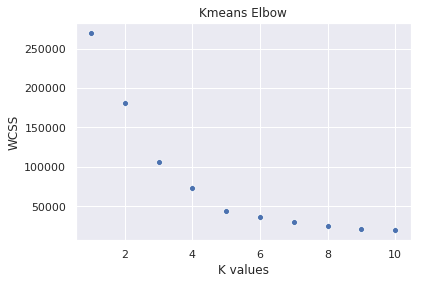

In [76]:
# Plotting the graph to find the best value  of K i.e number of clusters
sns.scatterplot(np.arange(1,11),wcss)
plt.title('Kmeans Elbow')
plt.xlabel('K values')
plt.ylabel('WCSS')

In [77]:
km = KMeans(init='k-means++',n_jobs=10,n_clusters=5)
result = km.fit_predict(X)

In [100]:
result[:5]

array([3, 1, 3, 1, 3], dtype=int32)

In [78]:
# appending the result to the imput so that we can see the visualizations
X['result']=result

/home/admin1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [79]:
X.columns

Index(['Annual Income (k$)', 'Spending Score (1-100)', 'result'], dtype='object')

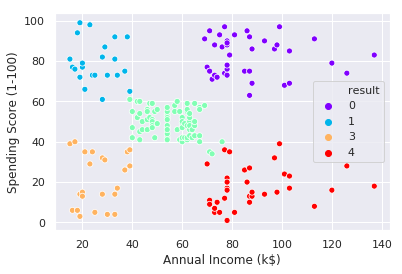

In [80]:
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',hue='result',data=X,palette='rainbow')

In [103]:
centers=km.cluster_centers_

In [104]:
centers

array([[86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

In [83]:
# Setting the variables 
X['result']= X['result'].replace({0:'careless',1:'Careful',4:'target',3:'sensible',2:'Standard'})

/home/admin1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


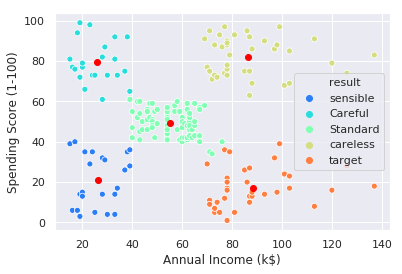

In [121]:
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',hue='result',data=X,palette='rainbow')
# plotting the center of clusters
plt.scatter(x=centers[:,0],y=centers[:,1],color='red')